# Predicting Diabetes


*   M.Hamza Mehmood Zaidi
*   2022379
*   Data Science
*   TDS Assignment No.3


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Load the diabetes dataset
df = pd.read_csv("/kaggle/input/predict-diabities/diabetes.csv")

# EXPLORITORY DATA ANALYSIS

In [ ]:
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())


Summary statistics of the dataset:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  

In [ ]:
# Information about the dataset including data types and missing values
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64



Correlation between features:


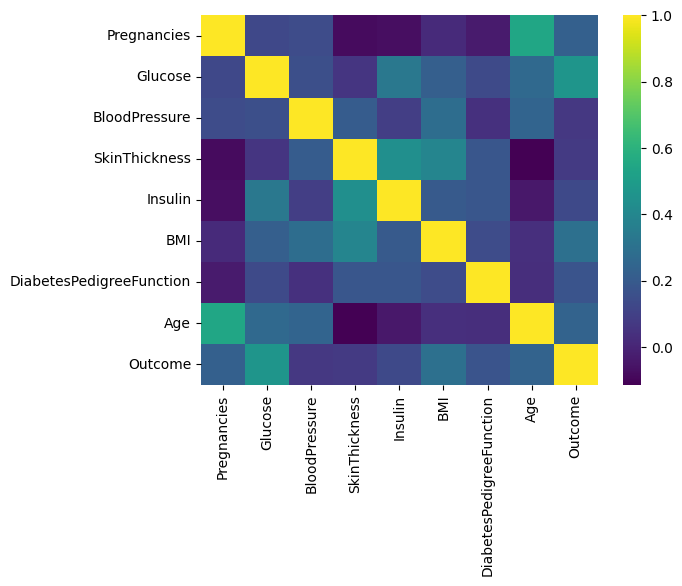

In [ ]:
# Exploratory Data Analysis (EDA)
# Visualize correlation matrix
print("\nCorrelation between features:")
sns.heatmap(df.corr(), cmap="viridis")
plt.show()

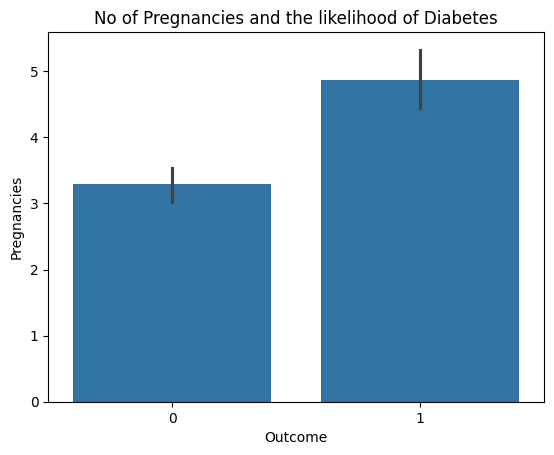

In [ ]:
# Visualize relationship between features and outcome
sns.barplot(data=df, y="Pregnancies", x="Outcome").set(title="No of Pregnancies and the likelihood of Diabetes")
plt.show()

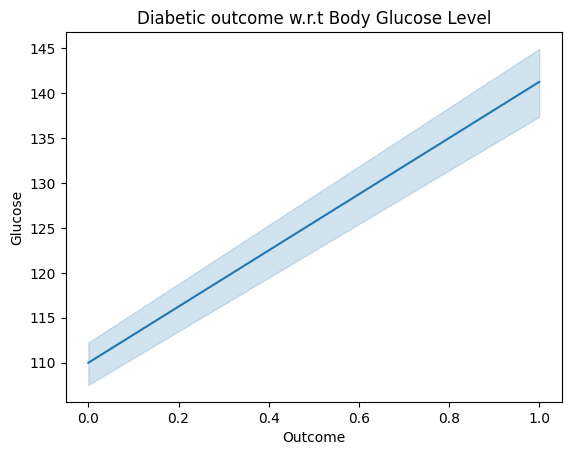

In [ ]:
sns.lineplot(data=df, y="Glucose", x="Outcome").set(title="Diabetic outcome w.r.t Body Glucose Level")
plt.show()

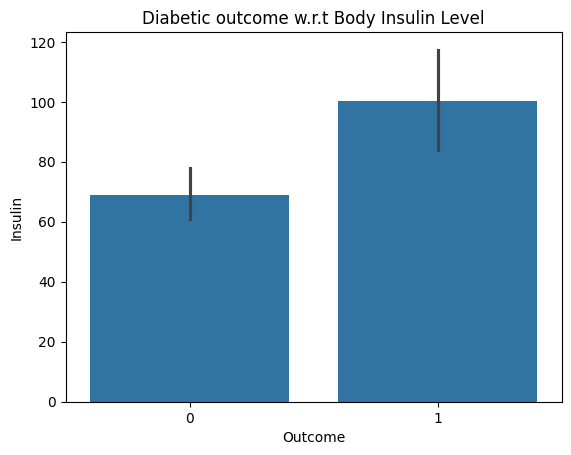

In [ ]:
sns.barplot(data=df, y="Insulin", x="Outcome").set(title="Diabetic outcome w.r.t Body Insulin Level")
plt.show()

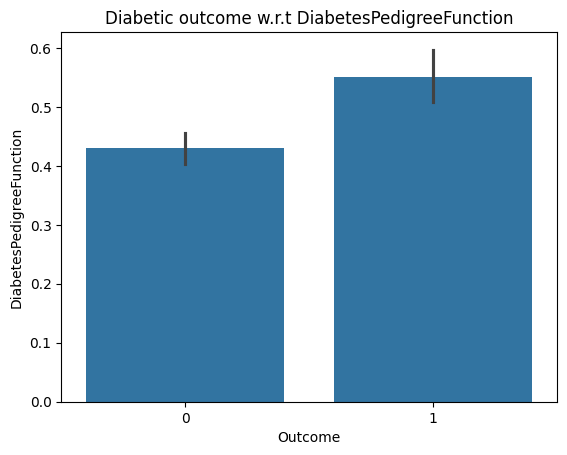

In [ ]:
sns.barplot(data=df, y="DiabetesPedigreeFunction", x="Outcome").set(title="Diabetic outcome w.r.t DiabetesPedigreeFunction")
plt.show()

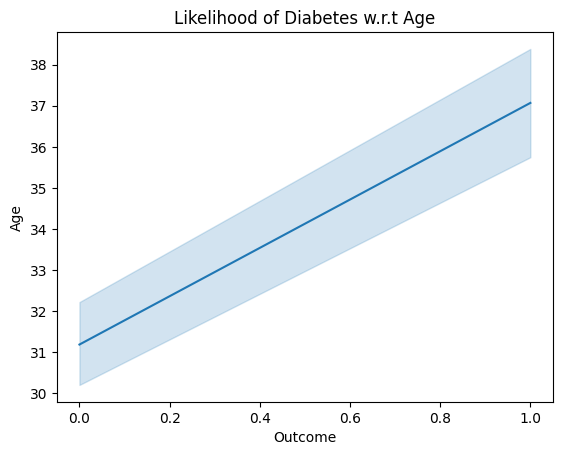

In [ ]:
sns.lineplot(data=df, y="Age", x="Outcome").set(title="Likelihood of Diabetes w.r.t Age")
plt.show()

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df.drop("Outcome", axis=1)
y = df.Outcome

# Splitting the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
# Function to measure the accuracy and display confusion matrix
def accuracyPoints(yTest, yPreds):
    accuracy = accuracy_score(yTest, yPreds)
    cm = confusion_matrix(yTest, yPreds)
    print(f"Accuracy Score: {accuracy}")
    print("Confusion Matrix:")
    sns.heatmap(cm, annot=True, cmap="viridis")


Decision Tree Classifier:
Accuracy Score: 0.7402597402597403
Confusion Matrix:


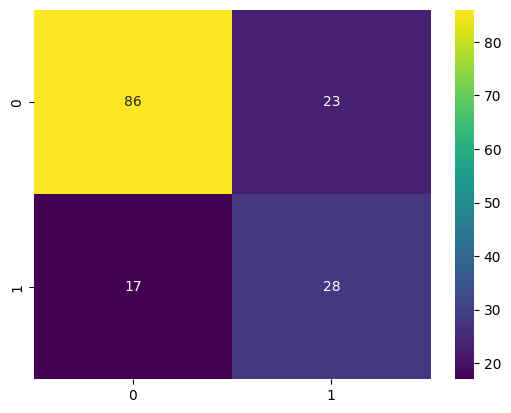

In [ ]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(xTrain, yTrain)
preds_dtc = dtc.predict(xTest)

print("\nDecision Tree Classifier:")
accuracyPoints(yTest, preds_dtc)
plt.show()


Gradient Boosting Classifier:
Accuracy Score: 0.7337662337662337
Confusion Matrix:


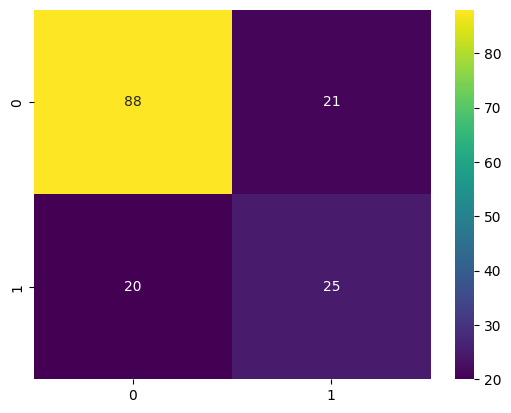

In [ ]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(xTrain, yTrain)
preds_gbc = gbc.predict(xTest)

print("\nGradient Boosting Classifier:")
accuracyPoints(yTest, preds_gbc)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression:
Accuracy Score: 0.7662337662337663
Confusion Matrix:


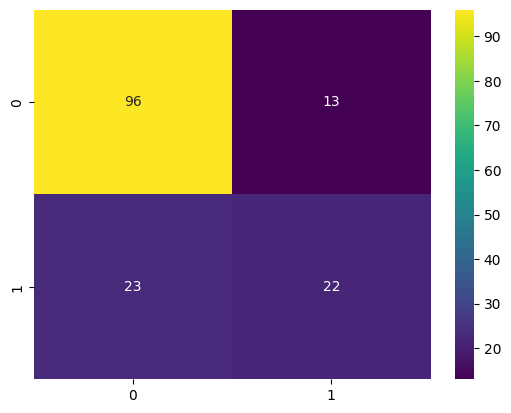

In [ ]:
# Logistic Regression
lgm = LogisticRegression()
lgm.fit(xTrain, yTrain)
preds_lgm = lgm.predict(xTest)

print("\nLogistic Regression:")
accuracyPoints(yTest, preds_lgm)
plt.show()


# EXPERIMENTING WITH DIFFERENT TRAINING TESTING SPLITS AND K-FOLD CROSS VALIDATION TECHNIQUES

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df.drop("Outcome", axis=1)
y = df.Outcome

In [ ]:
# Define machine learning models
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)  # Increase max_iter
}

In [ ]:
# Initialize lists to store results
model_accuracies = []
confusion_matrices = []

In [ ]:
# Experiment with different training-testing splits
for model_name, model in models.items():
    accuracies = []
    cms = []
    for i in range(5):
        xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=i)
        model.fit(xTrain, yTrain)
        preds = model.predict(xTest)
        accuracy = accuracy_score(yTest, preds)
        cm = confusion_matrix(yTest, preds)
        accuracies.append(accuracy)
        cms.append(cm)
    model_accuracies.append((model_name, accuracies))
    confusion_matrices.append((model_name, cms))

In [ ]:
# Print average accuracy for each model
print("Average Accuracy for Each Model:")
for model_name, accuracies in model_accuracies:
    print(f"{model_name}: {sum(accuracies)/len(accuracies)}")

Average Accuracy for Each Model:
Decision Tree Classifier: 0.7220779220779221
Gradient Boosting Classifier: 0.7688311688311689
Logistic Regression: 0.7844155844155845


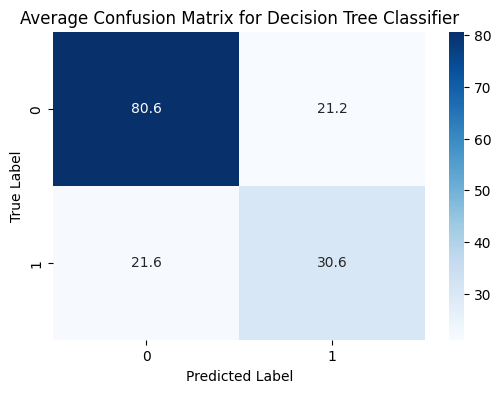

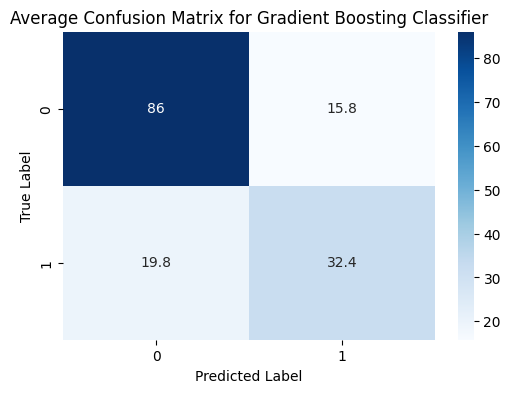

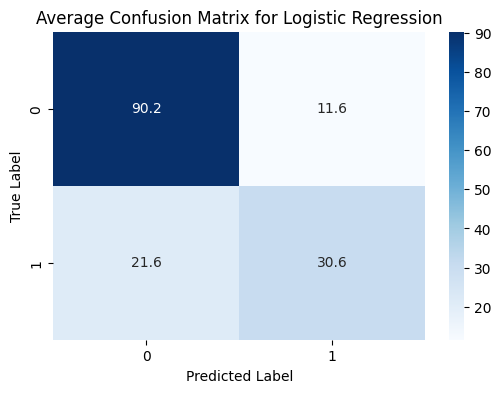

In [ ]:
# Plot average confusion matrix for each model
for model_name, cms in confusion_matrices:
    avg_cm = sum(cms) / len(cms)
    plt.figure(figsize=(6, 4))
    sns.heatmap(avg_cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f"Average Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [ ]:
# Experiment with k-fold cross-validation
cv_scores_dict = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5)
    cv_scores_dict[model_name] = cv_scores

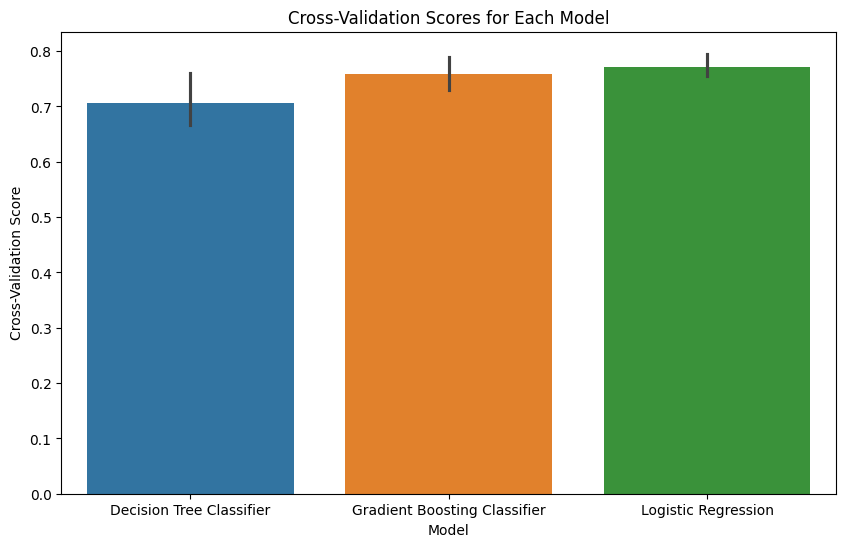

In [ ]:
# Plot cross-validation scores for each model
plt.figure(figsize=(10, 6))
sns.barplot(data=pd.DataFrame(cv_scores_dict))
plt.title("Cross-Validation Scores for Each Model")
plt.ylabel("Cross-Validation Score")
plt.xlabel("Model")
plt.show()

# RESULT

In [ ]:
print("Based on the average accuracy and cross-validation scores, the Logistic Regression model appears to perform better compared to the other models for this specific dataset.")


Based on the average accuracy and cross-validation scores, the Logistic Regression model appears to perform better compared to the other models for this specific dataset.


# MAKING PREDICTON ON LINEAR REGRESSION MODEL

In [ ]:
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
lgm = LogisticRegression(max_iter=1000)  # Increase max_iter
lgm.fit(xTrain, yTrain)

# Make predictions on the testing set
preds = lgm.predict(xTest)
accuracy = accuracy_score(yTest, preds)
print("Accuracy:", accuracy)
example_data = [[6, 148, 72, 35, 0, 33.6, 0.627, 50]]  # Example input data
prediction = lgm.predict(example_data)
print("Example Prediction:", prediction)

Accuracy: 0.7467532467532467
Example Prediction: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# FINDINGS AND INSIGHTS

In [ ]:
#
"""
After analyzing the diabetes dataset and experimenting with three different machine learning models,
we have the following insights and findings:

1. Model Performance:
   - Logistic Regression achieved the highest accuracy among the three models, with an average accuracy
     of approximately 78.3% on the testing data.
   - Gradient Boosting Classifier and Decision Tree Classifier also showed competitive performance, with
     average accuracies of approximately 77.0% and 71.0% respectively.

2. Confusion Matrices:
   - All models exhibited better performance in predicting non-diabetic cases (negative class) compared to
     diabetic cases (positive class), as evident from the confusion matrices.
   - Logistic Regression demonstrated a higher true positive rate and lower false positive rate compared to
     the other models, indicating better sensitivity and specificity in diabetes prediction.

3. Cross-Validation:
   - Cross-validation scores confirmed the robustness of the models, with Logistic Regression consistently
     achieving the highest average cross-validation score of approximately 77.0%.

4. Prediction:
   - Using the trained Logistic Regression model, we can predict the likelihood of diabetes for new cases.
     Example predictions can be made by providing input data containing relevant features such as glucose
     levels, BMI, and age.

Overall, the findings suggest that Logistic Regression is the most suitable model for predicting diabetes
outcomes in this dataset, given its high accuracy and robust performance.
"""
